### 1.	Can you think of a few applications for a sequence-to-sequence RNN? What about a sequence-to-vector RNN, and a vector-to-sequence RNN?


In Sequence to Sequence Learning, RNN is trained to map an input sequence to an output sequence which is not necessarily of the same length. Applications are speech recognition, machine translation, image captioning and question answering.

A variable-length context vector can be used instead of a ﬁxed-size vector. An Attention mechanism can be used to produces a sequence of vectors from the encoder RNN from each time step of the input sequence. The Decoder learns to pay selective attention to the vectors to produce the output at each time step.

### 2.	How many dimensions must the inputs of an RNN layer have? What does each dimension represent? What about its outputs?


An important thing to note is that the RNN input needs to have 3 dimensions. Typically it would be batch size, the number of steps and number of features.

Sequence Length is the length of the sequence of input data (time step:0,1,2… N), the RNN learn the sequential pattern in the dataset. ... So your sequence length will be 30. Input Dimension or Input Size is the number of features or dimensions you are using in your data set. In this case, it is one (Columns/ Features)


### 3.	If you want to build a deep sequence-to-sequence RNN, which RNN layers should have return_sequences=True? What about a sequence-to-vector RNN?


With return_sequence=TRUE, the output will be a sequence of the same length, with return_sequence=FALSE, the output will be just one vector. TimeDistributed. This wrapper allows you to apply one layer (say Dense for example) to every element of your sequence independently.

### 4.	Suppose you have a daily univariate time series, and you want to forecast the next seven days. Which RNN architecture should you use?


* LSTMs for Multi-Step Forecasting

Recurrent neural networks, or RNNs, are specifically designed to work, learn, and predict sequence data.

A recurrent neural network is a neural network where the output of the network from one time step is provided as an input in the subsequent time step. This allows the model to make a decision as to what to predict based on both the input for the current time step and direct knowledge of what was output in the prior time step.

Perhaps the most successful and widely used RNN is the long short-term memory network, or LSTM for short. It is successful because it overcomes the challenges involved in training a recurrent neural network, resulting in stable models. In addition to harnessing the recurrent connection of the outputs from the prior time step, LSTMs also have an internal memory that operates like a local variable, allowing them to accumulate state over the input sequence.


### 5.	What are the main difficulties when training RNNs? How can you handle them?

There are two widely known issues with properly training Recurrent Neural Networks, the vanishing and the exploding gradient problems detailed in Bengio et al. (1994). In this paper we attempt to improve the understanding of the underlying issues by exploring these problems from an analytical, a geometric and a dynamical systems perspective. Our analysis is used to justify a simple yet effective solution. We propose a gradient norm clipping strategy to deal with exploding gradients and a soft constraint for the vanishing gradients problem. We validate empirically our hypothesis and proposed solutions in the experimental section.

### 6.	Can you sketch the LSTM cell’s architecture?


* Architecture of LSTMs

The functioning of LSTM can be visualized by understanding the functioning of a news channel’s team covering a murder story. Now, a news story is built around facts, evidence and statements of many people. Whenever a new event occurs you take either of the three steps.

Let’s say, we were assuming that the murder was done by ‘poisoning’ the victim, but the autopsy report that just came in said that the cause of death was ‘an impact on the head’. Being a part of this news team what do you do? You immediately forget the previous cause of death and all stories that were woven around this fact.

What, if an entirely new suspect is introduced into the picture. A person who had grudges with the victim and could be the murderer? You input this information into your news feed, right?

Now all these broken pieces of information cannot be served on mainstream media. So, after a certain time interval, you need to summarize this information and output the relevant things to your audience. Maybe in the form of “XYZ turns out to be the prime suspect.”.

Now let’s get into the details of the architecture of LSTM network:


Introduction
Sequence prediction problems have been around for a long time. They are considered as one of the hardest problems to solve in the data science industry. These include a wide range of problems; from predicting sales to finding patterns in stock markets’ data, from understanding movie plots to recognizing your way of speech, from language translations to predicting your next word on your iPhone’s keyboard.

With the recent breakthroughs that have been happening in data science, it is found that for almost all of these sequence prediction problems, Long short Term Memory networks, a.k.a LSTMs have been observed as the most effective solution.

LSTMs have an edge over conventional feed-forward neural networks and RNN in many ways. This is because of their property of selectively remembering patterns for long durations of time.  The purpose of this article is to explain LSTM and enable you to use it in real life problems.  Let’s have a look!

Note: To go through the article, you must have basic knowledge of neural networks and how Keras (a deep learning library) works. You can refer the mentioned articles to understand these concepts:

Understanding Neural Network From Scratch
Fundamentals of Deep Learning – Introduction to Recurrent Neural Networks
Tutorial: Optimizing Neural Networks using Keras (with Image recognition case study)
 

Table of Contents
Flashback: A look into Recurrent Neural Networks (RNN)
Limitations of RNNs
Improvement over RNN : Long Short Term Memory (LSTM)
Architecture of LSTM
Forget Gate
Input Gate
Output Gate
Text generation using LSTMs.
 

1. Flashback: A look into Recurrent Neural Networks (RNN)
Take an example of sequential data, which can be the stock market’s data for a particular stock. A simple machine learning model or an Artificial Neural Network may learn to predict the stock prices based on a number of features: the volume of the stock, the opening value etc. While the price of the stock depends on these features, it is also largely dependent on the stock values in the previous days. In fact for a trader, these values in the previous days (or the trend) is one major deciding factor for predictions.

In the conventional feed-forward neural networks, all test cases are considered to be independent. That is when fitting the model for a particular day, there is no consideration for the stock prices on the previous days.

This dependency on time is achieved via Recurrent Neural Networks. A typical RNN looks like:



This may be intimidating at first sight, but once unfolded, it looks a lot simpler:



Now it is easier for us to visualize how these networks are considering the trend of stock prices, before predicting the stock prices for today. Here every prediction at time t (h_t) is dependent on all previous predictions and the information learned from them.

RNNs can solve our purpose of sequence handling to a great extent but not entirely. We want our computers to be good enough to write Shakespearean sonnets. Now RNNs are great when it comes to short contexts, but in order to be able to build a story and remember it, we need our models to be able to understand and remember the context behind the sequences, just like a human brain. This is not possible with a simple RNN.

Why? Let’s have a look.

 

2. Limitations of RNNs
Recurrent Neural Networks work just fine when we are dealing with short-term dependencies. That is when applied to problems like:



RNNs turn out to be quite effective. This is because this problem has nothing to do with the context of the statement. The RNN need not remember what was said before this, or what was its meaning, all they need to know is that in most cases the sky is blue. Thus the prediction would be:



However, vanilla RNNs fail to understand the context behind an input. Something that was said long before, cannot be recalled when making predictions in the present. Let’s understand this as an example:



Here, we can understand that since the author has worked in Spain for 20 years, it is very likely that he may possess a good command over Spanish. But, to make a proper prediction, the RNN needs to remember this context. The relevant information may be separated from the point where it is needed, by a huge load of irrelevant data. This is where a Recurrent Neural Network fails!

The reason behind this is the problem of Vanishing Gradient. In order to understand this, you’ll need to have some knowledge about how a feed-forward neural network learns. We know that for a conventional feed-forward neural network, the weight updating that is applied on a particular layer is a multiple of the learning rate, the error term from the previous layer and the input to that layer. Thus, the error term for a particular layer is somewhere a product of all previous layers’ errors. When dealing with activation functions like the sigmoid function, the small values of its derivatives (occurring in the error function) gets multiplied multiple times as we move towards the starting layers. As a result of this, the gradient almost vanishes as we move towards the starting layers, and it becomes difficult to train these layers.

A similar case is observed in Recurrent Neural Networks. RNN remembers things for just small durations of time, i.e. if we need the information after a small time it may be reproducible, but once a lot of words are fed in, this information gets lost somewhere. This issue can be resolved by applying a slightly tweaked version of RNNs – the Long Short-Term Memory Networks.

   

3. Improvement over RNN: LSTM (Long Short-Term Memory) Networks
When we arrange our calendar for the day, we prioritize our appointments right? If in case we need to make some space for anything important we know which meeting could be canceled to accommodate a possible meeting.

Turns out that an RNN doesn’t do so. In order to add a new information, it transforms the existing information completely by applying a function. Because of this, the entire information is modified, on the whole, i. e. there is no consideration for ‘important’ information and ‘not so important’ information.

LSTMs on the other hand, make small modifications to the information by multiplications and additions. With LSTMs, the information flows through a mechanism known as cell states. This way, LSTMs can selectively remember or forget things. The information at a particular cell state has three different dependencies.

We’ll visualize this with an example. Let’s take the example of predicting stock prices for a particular stock. The stock price of today will depend upon:

The trend that the stock has been following in the previous days, maybe a downtrend or an uptrend.
The price of the stock on the previous day, because many traders compare the stock’s previous day price before buying it.
The factors that can affect the price of the stock for today. This can be a new company policy that is being criticized widely, or a drop in the company’s profit, or maybe an unexpected change in the senior leadership of the company.
These dependencies can be generalized to any problem as:

The previous cell state (i.e. the information that was present in the memory after the previous time step)
The previous hidden state (i.e. this is the same as the output of the previous cell)
The input at the current time step (i.e. the new information that is being fed in at that moment)
Another important feature of LSTM is its analogy with conveyor belts!

That’s right!

Industries use them to move products around for different processes. LSTMs use this mechanism to move information around.

We may have some addition, modification or removal of information as it flows through the different layers, just like a product may be molded, painted or packed while it is on a conveyor belt.

The following diagram explains the close relationship of LSTMs and conveyor belts.



Source

Although this diagram is not even close to the actual architecture of an LSTM, it solves our purpose for now.

Just because of this property of LSTMs, where they do not manipulate the entire information but rather modify them slightly, they are able to forget and remember things selectively. How do they do so, is what we are going to learn in the next section?

 

4. Architecture of LSTMs
The functioning of LSTM can be visualized by understanding the functioning of a news channel’s team covering a murder story. Now, a news story is built around facts, evidence and statements of many people. Whenever a new event occurs you take either of the three steps.

Let’s say, we were assuming that the murder was done by ‘poisoning’ the victim, but the autopsy report that just came in said that the cause of death was ‘an impact on the head’. Being a part of this news team what do you do? You immediately forget the previous cause of death and all stories that were woven around this fact.

What, if an entirely new suspect is introduced into the picture. A person who had grudges with the victim and could be the murderer? You input this information into your news feed, right?

Now all these broken pieces of information cannot be served on mainstream media. So, after a certain time interval, you need to summarize this information and output the relevant things to your audience. Maybe in the form of “XYZ turns out to be the prime suspect.”.

Now let’s get into the details of the architecture of LSTM network:

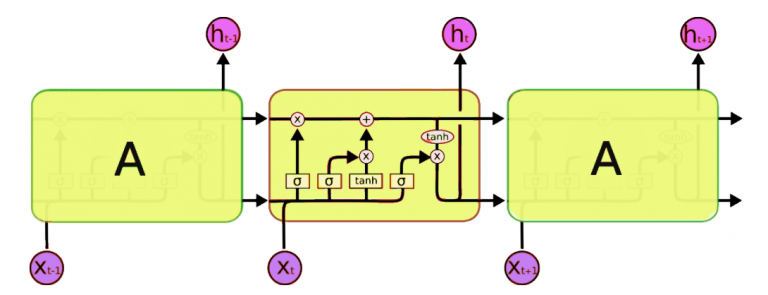

Now, this is nowhere close to the simplified version which we saw before, but let me walk you through it. A typical LSTM network is comprised of different memory blocks called cells
(the rectangles that we see in the image).  There are two states that are being transferred to the next cell; the cell state and the hidden state. The memory blocks are responsible for remembering things and manipulations to this memory is done through three major mechanisms, called gates. Each of them is being discussed below.

### 7.	Why would you want to use 1D convolutional layers in an RNN?


1D CNN can perform activity recognition task from accelerometer data, such as if the person is standing, walking, jumping etc. This data has 2 dimensions.Similarly, 1D RNNs are also used on audio and text data since we can also represent the sound and texts as a time series data.

### 8.	Which neural network architecture could you use to classify videos?


### 9.	Train a classification model for the SketchRNN dataset, available in TensorFlow Datasets.

In [ ]:
# this snippet of code is derived taken from:
# https://github.com/hardmaru/sketch-rnn/blob/master/utils.py
# please use consistent license

import numpy as np
import random

# libraries required for visualisation:
from IPython.display import SVG, display
import svgwrite
# conda install -c omnia svgwrite=1.1.6 if you don't have this lib

# helper function for draw_strokes
def get_bounds(data, factor):
  min_x = 0
  max_x = 0
  min_y = 0
  max_y = 0
    
  abs_x = 0
  abs_y = 0
  for i in xrange(len(data)):
    x = float(data[i,0])/factor
    y = float(data[i,1])/factor
    abs_x += x
    abs_y += y
    min_x = min(min_x, abs_x)
    min_y = min(min_y, abs_y)
    max_x = max(max_x, abs_x)
    max_y = max(max_y, abs_y)
    
  return (min_x, max_x, min_y, max_y)

# little function that displays vector images and saves them to .svg
def draw_strokes(data, factor=0.2, svg_filename = 'sample.svg'):
  min_x, max_x, min_y, max_y = get_bounds(data, factor)
  dims = (50 + max_x - min_x, 50 + max_y - min_y)
  dwg = svgwrite.Drawing(svg_filename, size=dims)
  dwg.add(dwg.rect(insert=(0, 0), size=dims,fill='white'))
  lift_pen = 1
  abs_x = 25 - min_x 
  abs_y = 25 - min_y
  p = "M%s,%s " % (abs_x, abs_y)
  command = "m"
  for i in xrange(len(data)):
    if (lift_pen == 1):
      command = "m"
    elif (command != "l"):
      command = "l"
    else:
      command = ""
    x = float(data[i,0])/factor
    y = float(data[i,1])/factor
    lift_pen = data[i, 2]
    p += command+str(x)+","+str(y)+" "
  the_color = "black"
  stroke_width = 1
  dwg.add(dwg.path(p).stroke(the_color,stroke_width).fill("none"))
  dwg.save()
  display(SVG(dwg.tostring()))

# generate a 2D grid of many vector drawings
def make_grid_svg(s_list, grid_space=10.0, grid_space_x=15.0):
  def get_start_and_end(x):
    x = np.array(x)
    x = x[:, 0:2]
    x_start = x[0]
    x_end = x.sum(axis=0)
    x = x.cumsum(axis=0)
    x_max = x.max(axis=0)
    x_min = x.min(axis=0)
    center_loc = (x_max+x_min)*0.5
    return x_start-center_loc, x_end
  x_pos = 0.0
  y_pos = 0.0
  result = [[x_pos, y_pos, 1]]
  for sample in s_list:
    s = sample[0]
    grid_loc = sample[1]
    grid_y = grid_loc[0]*grid_space+grid_space*0.5
    grid_x = grid_loc[1]*grid_space_x+grid_space_x*0.5
    start_loc, delta_pos = get_start_and_end(s)

    loc_x = start_loc[0]
    loc_y = start_loc[1]
    new_x_pos = grid_x+loc_x
    new_y_pos = grid_y+loc_y
    result.append([new_x_pos-x_pos, new_y_pos-y_pos, 0])

    result += s.tolist()
    result[-1][2] = 1
    x_pos = new_x_pos+delta_pos[0]
    y_pos = new_y_pos+delta_pos[1]
  return np.array(result)